Question 3. In a random-walk 1D diffusion, use a Gaussian function 
$ exp({{\delta x^{2}} \over{\sigma^{2}}})$
to determine step size 𝛿𝑥.Find the temperature of analytic 
result that best fits the random-walk diffusion. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Number of particles to use for simulation
N = int(10000)

# Size of the unit walk step.
dx = float(0.1)

# Max steps of simulation
smax = int(110)

# Number of bins for density distribution plot
nBin = 10

# Calculation of theoretical parameters
D = 0.5 * (dx) ** 2  # suppose dt=1
tau = 1.0 / (D * np.pi * np.pi)

In [3]:
x = np.zeros(N)  # Zero-initialized particle positions

In [4]:
# Construct the initial sine-distribution of 10000 particles
i = 0
while i < N:
    V = random.random()
    T = random.random()
    val = np.sin(np.pi * V)
    if T <= val:
        x[i] = V
        i += 1

In [5]:
# Create bin meshes for density distribution
f = np.zeros(nBin + 1)
bnX = np.arange(0, nBin + 1)
bnX = bnX / (1.0 * nBin)  # x-value for the distr-plot

In [6]:
#standard deviation
sigma = float(input("Standard deviatioin"))

Standard deviatioin0.1


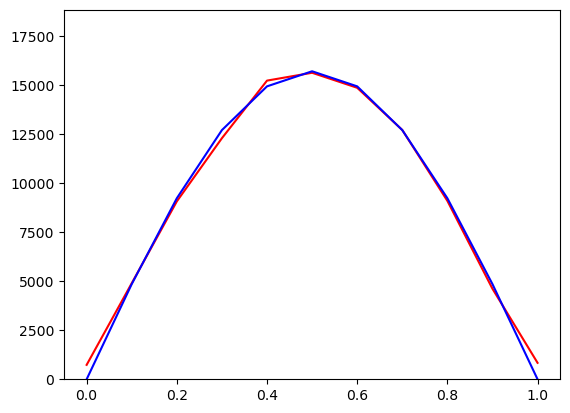

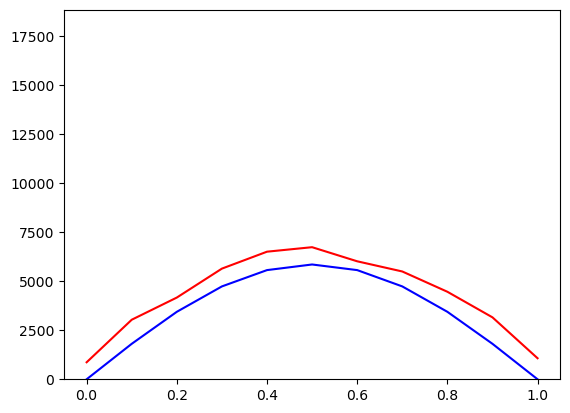

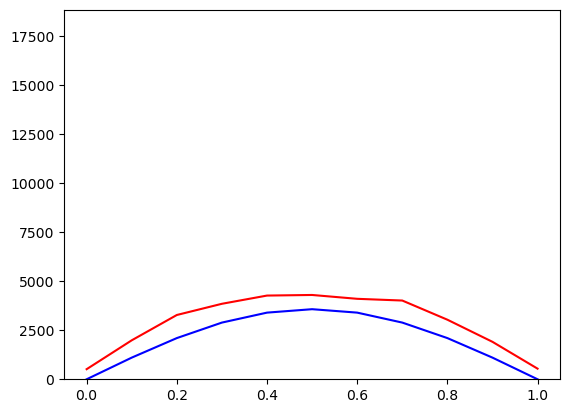

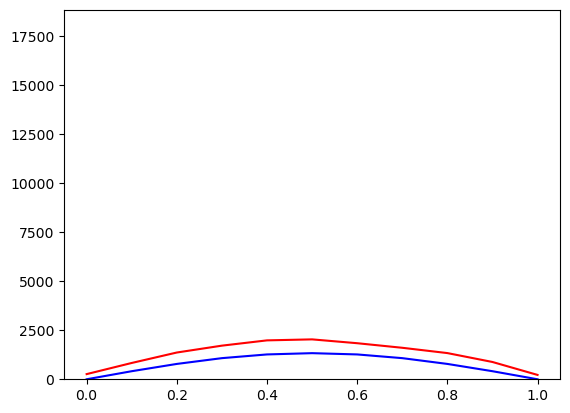

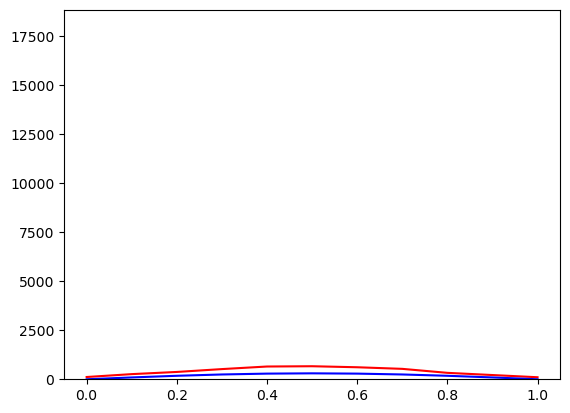

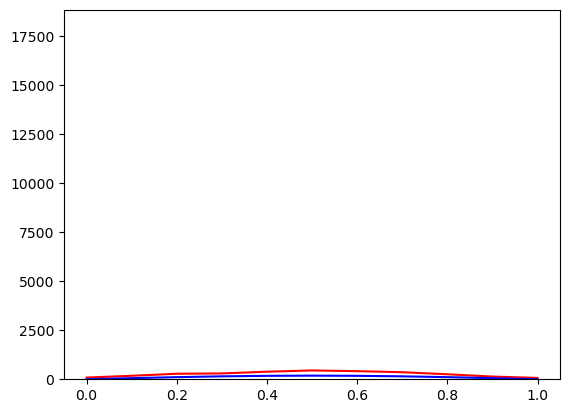

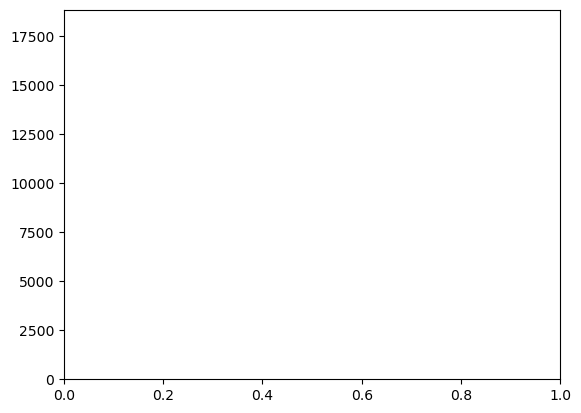

In [7]:
# Main loop
for s in range(smax):
    f = 0.0 * f  # empty the bin for new constructon of the distr. every step
    for i in range(N):
        if 0 <= x[i] and x[i] <= 1:
            y = x[i] * (1.0 * nBin)  # normalize the potision to bin
            m = int(y)  # find the bin index
            y -= m  # find the relative displacement in bin
            f[m] += (1.0 - y);
            f[m + 1] += y
            #x[i] = x[i] + random.choice([dx, -dx])
            x[i] = x[i] + np.random.normal(0,sigma,1)[0]  # random walk
    f = (1.0 * nBin) * f  # normalization factor for distri.
    plt.ylim(0, 1.2 * np.pi * N / 2.0)
    z = 0.5 * np.pi * N * np.sin(np.pi * bnX) * np.exp(-(1.0 * s) / tau)
    if s %10 == 0:
        plt.plot(bnX, f, c='r')
        plt.plot(bnX, z, c='b')
        plt.draw()
        plt.pause(0.01)
        plt.clf()

 When standard deviation is 0.1, it was the best fit. 

What is the relation 
between 𝜎 and the temperature? Can you explain it physically?

Maxwell-Boltzman speed distribution in 1 dimension is 
$ g(v_{x}) = \sqrt {{{m}\over{2\pi k_{B}T}}} e^{-{mv^{2}}\over{2k_{B}T}}$.$\\$
That is, $\sigma = \sqrt{{{2\pi k_{B}T}\over{m}}}$ 

Therefore, $\sigma$ is proportional to square of T

For each standard deviationi, we can calculate T
From $ \tau  = {{1}\over{\pi^{2}D}}={{mv}\over{\pi^{2}k_{B}T}}$

In [45]:
def scatter_sine(x,N) :
    i = 0
    while i < N:
        V = random.random()
        T = random.random()
        val = np.sin(np.pi * V)
        if T <= val:
            x[i] = V
            i += 1
    return x 

In [52]:
def rwd(smax, N, f, x, sigma) :
    for s in range(smax):
        f = 0.0 * f  # empty the bin for new constructon of the distr. every step
        for i in range(N):
            if 0 <= x[i] and x[i] <= 1:
                y = x[i] * (1.0 * nBin)  # normalize the potision to bin
                m = int(y)  # find the bin index
                y -= m  # find the relative displacement in bin
                f[m] += (1.0 - y);
                f[m + 1] += y
                #x[i] = x[i] + random.choice([dx, -dx])
                x[i] = x[i] + np.random.normal(0,sigma,1)[0]  # random walk
        f = (1.0 * nBin) * f  # normalization factor for distri.

        if s == 0 :
            fsum_0 = np.sum(f)

        if np.sum(f)/fsum_0 <= 1/np.e :
            ct = s
            break

        
    return ct


In [50]:
ct = np.zeros(5) # measured characteristic time
T = np.zeros(5) # temperature
st = np.array([0.02,0.04,0.06,0.08,0.1]) # standard deviation

In [53]:
for i in range(5) :
    x = np.zeros(N)
    sigma = float(i)
    x = scatter_sine(x,N)
    print(st[i])
    ct[i] = rwd(1000, N, f, x, st[i])
    print(ct[i])
    print(1/ct[i])

0.02
536.0
0.0018656716417910447
0.04
139.0
0.007194244604316547
0.06
66.0
0.015151515151515152
0.08
40.0
0.025
0.1
27.0
0.037037037037037035


In [55]:
T = 1/ct

In [63]:
plt.scatter(st,T, label = "measured")
plt.plot(st, (T[4]/st[4]**2)*st**2, label = "theoretical", c = 'orange') #(T[4]/st[4]**2) is coefficient for fitting
plt.xlabel("standard deviation")
plt.ylabel("temperature")
plt.legend()
plt.show()

We can see T is proportional to squre of standard deviation